In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')

In [6]:
df.head()

,Job Title,Salary Estimate,Company Name,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
0,Data Scientist I,Employer Provided Salary:$102K - $148K,Indeed,4.3,Remote,10000+ Employees,2004.0,Company - Private,Internet,Information Technology,$2 to $5 billion (USD),0,1,102,148,125.0,Ind,Remote,17.0
1,Data Scientist - Entry Level,$69K - $115K (Glassdoor est.),JPL/NASA,4.5,"Pasadena, CA",5001 to 10000 Employees,1936.0,Nonprofit Organization,Federal Agencies,Government,Unknown / Non-Applicable,0,0,69,115,92.0,JPL/N,CA,85.0
2,University Grad Data Scientist,$97K - $186K (Glassdoor est.),Pinterest,4.2,"San Francisco, CA",1001 to 5000 Employees,2010.0,Company - Public,Internet,Information Technology,$100 to $500 million (USD),0,0,97,186,141.5,Pinter,CA,11.0
3,"Data Scientist, University Graduate - 2022 Start",$56K - $132K (Glassdoor est.),TikTok,-1.0,"Los Angeles, CA",1001 to 5000 Employees,2016.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,0,0,56,132,94.0,TikTok,CA,5.0
4,"Data Scientist, Game Analytics & Strategy",$80K - $156K (Glassdoor est.),the NBA,3.9,"New York, NY",1001 to 5000 Employees,1946.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",Unknown / Non-Applicable,0,0,80,156,118.0,the,NY,75.0


In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Company Name', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age'],
      dtype='object')

In [8]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [9]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [10]:
df.job_simp.value_counts()

data scientist    85
analyst            2
Name: job_simp, dtype: int64

In [11]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        77
senior     8
jr         2
Name: seniority, dtype: int64

In [16]:
##  Fix state Los Angeles 
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA        33
NY        18
WA         8
TX         5
Remote     4
IL         3
MD         3
VA         2
ND         1
GA         1
MA         1
FL         1
OH         1
MN         1
MO         1
NJ         1
CT         1
NE         1
Lake       1
Name: job_state, dtype: int64

In [17]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [18]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
23,1,120,140


In [27]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age
count,87.000000,86.000000,87.000000,87.000000,87.000000,87.000000,87.000000,86.000000
mean,2.966667,1668.372093,0.011494,0.137931,83.747126,152.333333,117.293103,46.825581
std,2.151942,710.255845,0.107211,0.346827,17.809860,30.454566,22.241219,52.505953
min,-1.000000,-1.000000,0.000000,0.000000,40.000000,75.000000,57.500000,-1.000000
25%,3.100000,1901.000000,0.000000,0.000000,70.500000,132.500000,100.500000,9.000000
50%,4.000000,1967.500000,0.000000,0.000000,82.000000,153.000000,118.000000,23.000000
75%,4.200000,2006.000000,0.000000,0.000000,96.500000,171.000000,130.250000,82.500000
max,5.000000,2019.000000,1.000000,1.000000,136.000000,244.000000,177.500000,184.000000


In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Company Name', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'job_simp', 'seniority'],
      dtype='object')

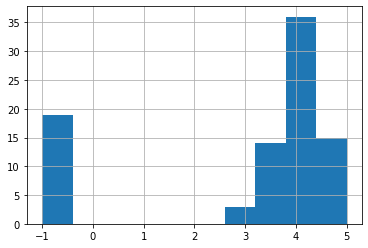

In [25]:
df.Rating.hist()

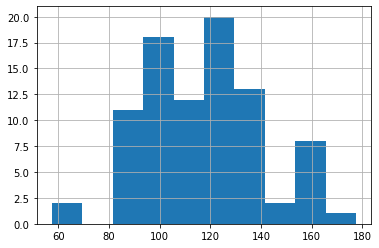

In [26]:
df.avg_salary.hist()

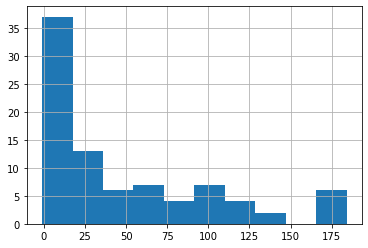

In [28]:
df.age.hist()

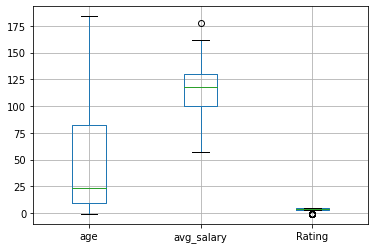

In [29]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

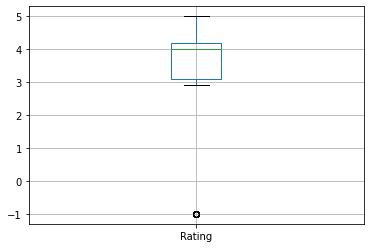

In [30]:
df.boxplot(column = 'Rating')

In [31]:
df[['age','avg_salary','Rating']].corr()

,age,avg_salary,Rating
age,1.000000,-0.295560,0.281148
avg_salary,-0.295560,1.000000,0.202594
Rating,0.281148,0.202594,1.000000


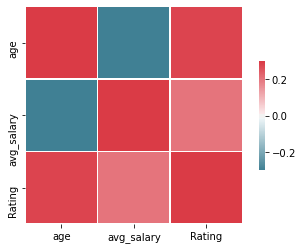

In [32]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df.columns

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Company Name', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'job_simp', 'seniority'],
      dtype='object')

In [34]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state',  'job_simp', 'seniority']]

graph for Location: total = 33


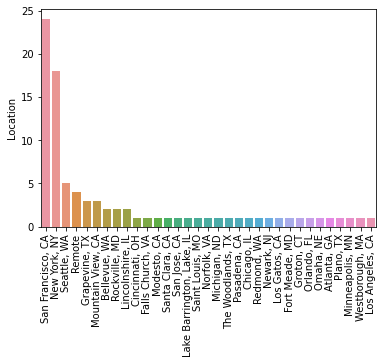

graph for Size: total = 9


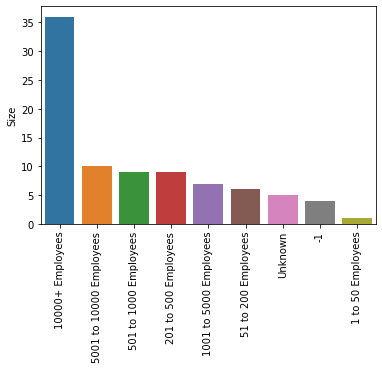

graph for Type of ownership: total = 6


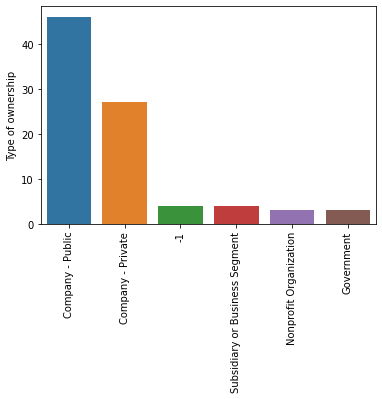

graph for Industry: total = 27


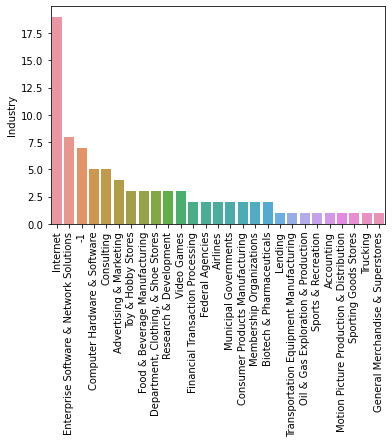

graph for Sector: total = 14


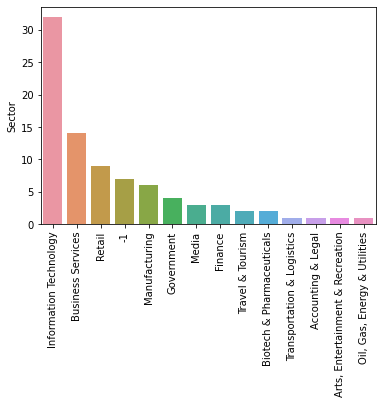

graph for Revenue: total = 12


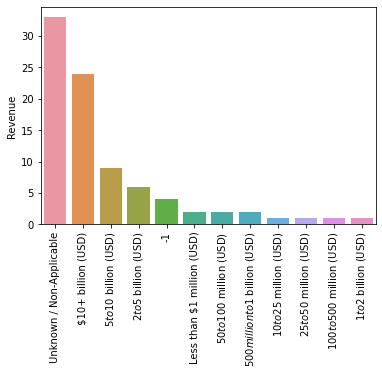

graph for company_txt: total = 57


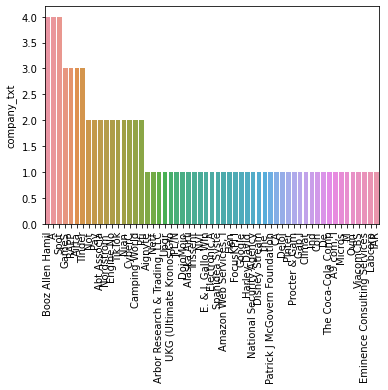

graph for job_state: total = 19


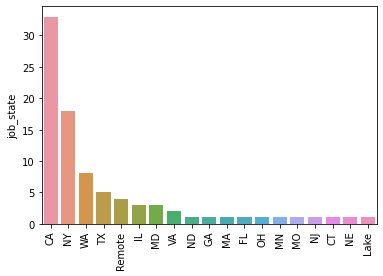

graph for job_simp: total = 2


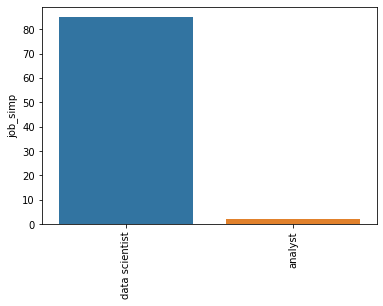

graph for seniority: total = 3


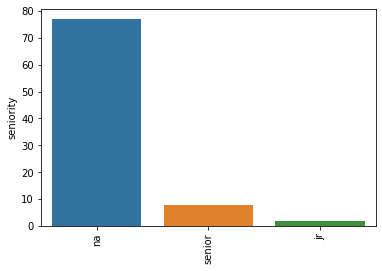

In [35]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


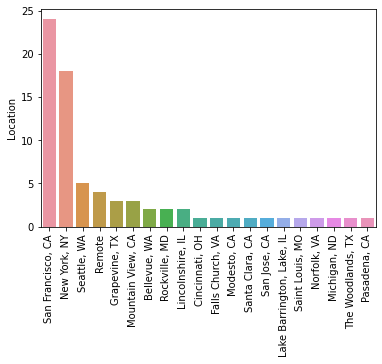

graph for company_txt: total = 20


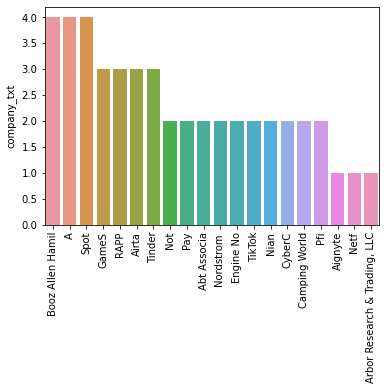

In [36]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [37]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,113.500000
data scientist,117.382353


In [38]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na           113.5000
data scientist jr           101.0000
               na           114.6400
               senior       147.1875

In [39]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WA        data scientist  120.312500
VA        data scientist   95.750000
TX        data scientist   98.200000
Remote    data scientist  101.250000
OH        data scientist  121.500000
NY        data scientist  125.218750
          analyst         113.500000
NJ        data scientist  100.500000
NE        data scientist  110.500000
ND        data scientist   95.000000
MO        data scientist  103.000000
MN        data scientist  110.000000
MD        data scientist  103.833333
MA        data scientist   88.500000
Lake      data scientist   57.500000
IL        data scientist  105.500000
GA        data scientist  115.500000
FL        data scientist   93.000000
CT        data scientist  105.500000
CA        data scientist  127.136364

In [40]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [41]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WA        data scientist           8
VA        data scientist           2
TX        data scientist           5
Remote    data scientist           4
OH        data scientist           1
NY        data scientist          16
          analyst                  2
NJ        data scientist           1
NE        data scientist           1
ND        data scientist           1
MO        data scientist           1
MN        data scientist           1
MD        data scientist           3
MA        data scientist           1
Lake      data scientist           1
IL        data scientist           3
GA        data scientist           1
FL        data scientist           1
CT        data scientist           1
CA        data scientist          33

In [42]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,127.136364
NY,125.218750
OH,121.500000
WA,120.312500
GA,115.500000
NE,110.500000
MN,110.000000
IL,105.500000
CT,105.500000


In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Company Name', 'Rating', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'job_simp', 'seniority'],
      dtype='object')

In [44]:
# rating, industry, sector, revenue, hourly, employer provided, Type of onwership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'Type of ownership','avg_salary']]


In [45]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 5.0    133.916667
 4.4    133.500000
 4.6    128.875000
 4.2    125.250000
 4.1    120.200000
 3.7    118.437500
 3.9    115.500000
 3.3    115.000000
 3.4    113.500000
 4.0    112.600000
 4.5    111.666667
-1.0    111.052632
 3.8    110.500000
 4.3    107.000000
 2.9    100.500000
 3.5     90.000000
Industry
                                          avg_salary
Industry                                            
Computer Hardware & Software              138.400000
Internet                                  135.657895
Enterprise Software & Network Solutions   131.000000
Advertising & Marketing                   126.500000
Trucking                                  126.000000
Lending                                   125.500000
Municipal Governments                     119.000000
Sports & Recreation                       118.000000
Video Games                               117.666667
Airlines                                  116.750000
Member

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [47]:
df

,Job Title,Salary Estimate,Company Name,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,...,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age,job_simp,seniority
0,Data Scientist I,Employer Provided Salary:$102K - $148K,Indeed,4.3,Remote,10000+ Employees,2004.0,Company - Private,Internet,Information Technology,...,0,1,102,148,125.0,Ind,Remote,17.0,data scientist,na
1,Data Scientist - Entry Level,$69K - $115K (Glassdoor est.),JPL/NASA,4.5,"Pasadena, CA",5001 to 10000 Employees,1936.0,Nonprofit Organization,Federal Agencies,Government,...,0,0,69,115,92.0,JPL/N,CA,85.0,data scientist,na
2,University Grad Data Scientist,$97K - $186K (Glassdoor est.),Pinterest,4.2,"San Francisco, CA",1001 to 5000 Employees,2010.0,Company - Public,Internet,Information Technology,...,0,0,97,186,141.5,Pinter,CA,11.0,data scientist,na
3,"Data Scientist, University Graduate - 2022 Start",$56K - $132K (Glassdoor est.),TikTok,-1.0,"Los Angeles, CA",1001 to 5000 Employees,2016.0,Company - Private,Internet,Information Technology,...,0,0,56,132,94.0,TikTok,CA,5.0,data scientist,na
4,"Data Scientist, Game Analytics & Strategy",$80K - $156K (Glassdoor est.),the NBA,3.9,"New York, NY",1001 to 5000 Employees,1946.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",...,0,0,80,156,118.0,the,NY,75.0,data scientist,na
5,Data Scientist,$103K - $200K (Glassdoor est.),Microsoft,4.4,"Redmond, WA",10000+ Employees,1975.0,Company - Public,Computer Hardware & Software,Information Technology,...,0,0,103,200,151.5,Micros,WA,46.0,data scientist,na
6,Data Scientist,$70K - $112K (Glassdoor est.),Booz Allen Hamilton,4.2,"Norfolk, VA",10000+ Employees,1914.0,Company - Public,Consulting,Business Services,...,0,0,70,112,91.0,Booz Allen Hamil,VA,107.0,data scientist,na
7,Sr Data Scientist,$111K - $244K (Glassdoor est.),Netflix,4.2,"Los Gatos, CA",5001 to 10000 Employees,1997.0,Company - Public,Internet,Information Technology,...,0,0,111,244,177.5,Netf,CA,24.0,data scientist,senior
8,"Data Scientist, Operations Data Science",Employer Provided Salary:$95K,Google,-1.0,"Mountain View, CA",10000+ Employees,1998.0,Company - Public,Internet,Information Technology,...,0,1,95,95,95.0,Google,CA,23.0,data scientist,na
9,Data Scientist Analyst,$68K - $133K (Glassdoor est.),MARS,4.2,"Newark, NJ",10000+ Employees,1911.0,Company - Private,Food & Beverage Manufacturing,Manufacturing,...,0,0,68,133,100.5,M,NJ,110.0,data scientist,na


In [48]:
df.to_csv('eda_data.csv')